In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [283]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [284]:
hla1=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/pbsim_ONT_93_30k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
hla3=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/pbsim_pb_hifi_10k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
hla2=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/pbsim_ONT_95_20k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')

igk1=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/IGK/pbsim_ONT_93_30k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
igk3=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/IGK/pbsim_pb_hifi_10k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
igk2=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/IGK/pbsim_ONT_95_20k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')

tair1=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/TAIR/chr3/pbsim_ONT_93_30k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
tair3=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/TAIR/chr3/pbsim_pb_hifi_10k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
tair2=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/TAIR/chr3/pbsim_ONT_95_20k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')

yeast1=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/yeast/chr10/pbsim_ONT_93_30k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
yeast3=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/yeast/chr10/pbsim_pb_hifi_10k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
yeast2=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/yeast/chr10/pbsim_ONT_95_20k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')

In [285]:
all_df_name = ['hla1','hla2','hla3','igk1','igk2','igk3','tair1','tair2','tair3','yeast1','yeast2','yeast3']
regions = ['hla','hla','hla','igk','igk','igk','tair','tair','tair','yeast','yeast','yeast']
sequence_type = ['93_30k','95_20k','98_10k','93_30k','95_20k','98_10k','93_30k','95_20k','98_10k','93_30k','95_20k','98_10k']

all_df = [hla1,hla2,hla3,igk1,igk2,igk3,tair1,tair2,tair3,yeast1,yeast2,yeast3]

In [286]:
new_headers = ['method', 'precision', 'recall', 'continuity']
new_df = []
for i,df in enumerate(all_df):
    df = df.iloc[:,[1,3,6,11]]
    df.columns=new_headers
    df['category']=all_df_name[i]
    df['regions']=regions[i]
    df['sequence_type']=sequence_type[i]
    new_df.append(df)

/tmp/ipykernel_3838231/3703524851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category']=all_df_name[i]
/tmp/ipykernel_3838231/3703524851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['regions']=regions[i]
/tmp/ipykernel_3838231/3703524851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [287]:
new_all_df = pd.concat(new_df)
new_all_df = new_all_df.dropna()

all_df3 = new_all_df.copy()

In [ ]:
new_all_df[['de_method', 'distance','dimension_reduction']] = new_all_df['method'].str.split('_', n=2, expand=True)
new_all_df[['method', 'preprocess']] = new_all_df['method'].str.rsplit('_', n=1, expand=True)

In [254]:
one_line = pd.melt(new_all_df, id_vars=['method','regions','sequence_type','preprocess','de_method','distance','dimension_reduction'], value_vars=['precision', 'recall','continuity'])

In [ ]:
weighted_method = [
    'WeightedMinHash_Jaccard_None',
    'Exact_Cosine_None',
    'Exact_Cosine_PCA_500d',
    'Exact_Cosine_Spectural_500d',
    'Exact_Cosine_scBiMap_500d',
    'Exact_Cosine_GaussianRP_500d',
    'Exact_Euclidean_GaussianRP_500d',
    'Exact_Euclidean_None',
    'Exact_Euclidean_PCA_500d',
    'Exact_Euclidean_SparseRP_500d',
    'Exact_Euclidean_Spectural_500d',
    'HNSW_Cosine_GaussianRP_500d',

    ]

In [255]:
new_all_df

,method,precision,recall,continuity,category,regions,sequence_type,preprocess,de_method,distance,dimension_reduction
0,HNSW_Cosine_GaussianRP_500d,0.990224,0.624149,0.995569,hla1,hla,93_30k,IDF,HNSW,Cosine,GaussianRP_500d
1,HNSW_Euclidean_Spectural_500d,0.621725,0.350215,0.731069,hla1,hla,93_30k,IDF,HNSW,Euclidean,Spectural_500d
2,NewSimHash2_Cosine_None,0.999601,0.639989,1.0,hla1,hla,93_30k,None,NewSimHash2,Cosine,None
3,HNSW_Cosine_SparseRP_500d,0.992125,0.621578,0.996912,hla1,hla,93_30k,IDF,HNSW,Cosine,SparseRP_500d
4,HNSW_Cosine_Spectural_500d,0.997976,0.507364,1.0,hla1,hla,93_30k,None,HNSW,Cosine,Spectural_500d
...,...,...,...,...,...,...,...,...,...,...,...
26,HNSW_Euclidean_Spectural_500d,0.402590,0.222537,0.564545,yeast3,yeast,98_10k,TF,HNSW,Euclidean,Spectural_500d
27,Exact_Euclidean_None,0.732154,0.510053,0.98293,yeast3,yeast,98_10k,None,Exact,Euclidean,None
28,HNSW_Cosine_scBiMap_500d,0.986375,0.453299,0.997155,yeast3,yeast,98_10k,TF-IDF,HNSW,Cosine,scBiMap_500d
29,HNSW_Euclidean_scBiMap_500d,0.986267,0.453482,0.997155,yeast3,yeast,98_10k,IDF,HNSW,Euclidean,scBiMap_500d


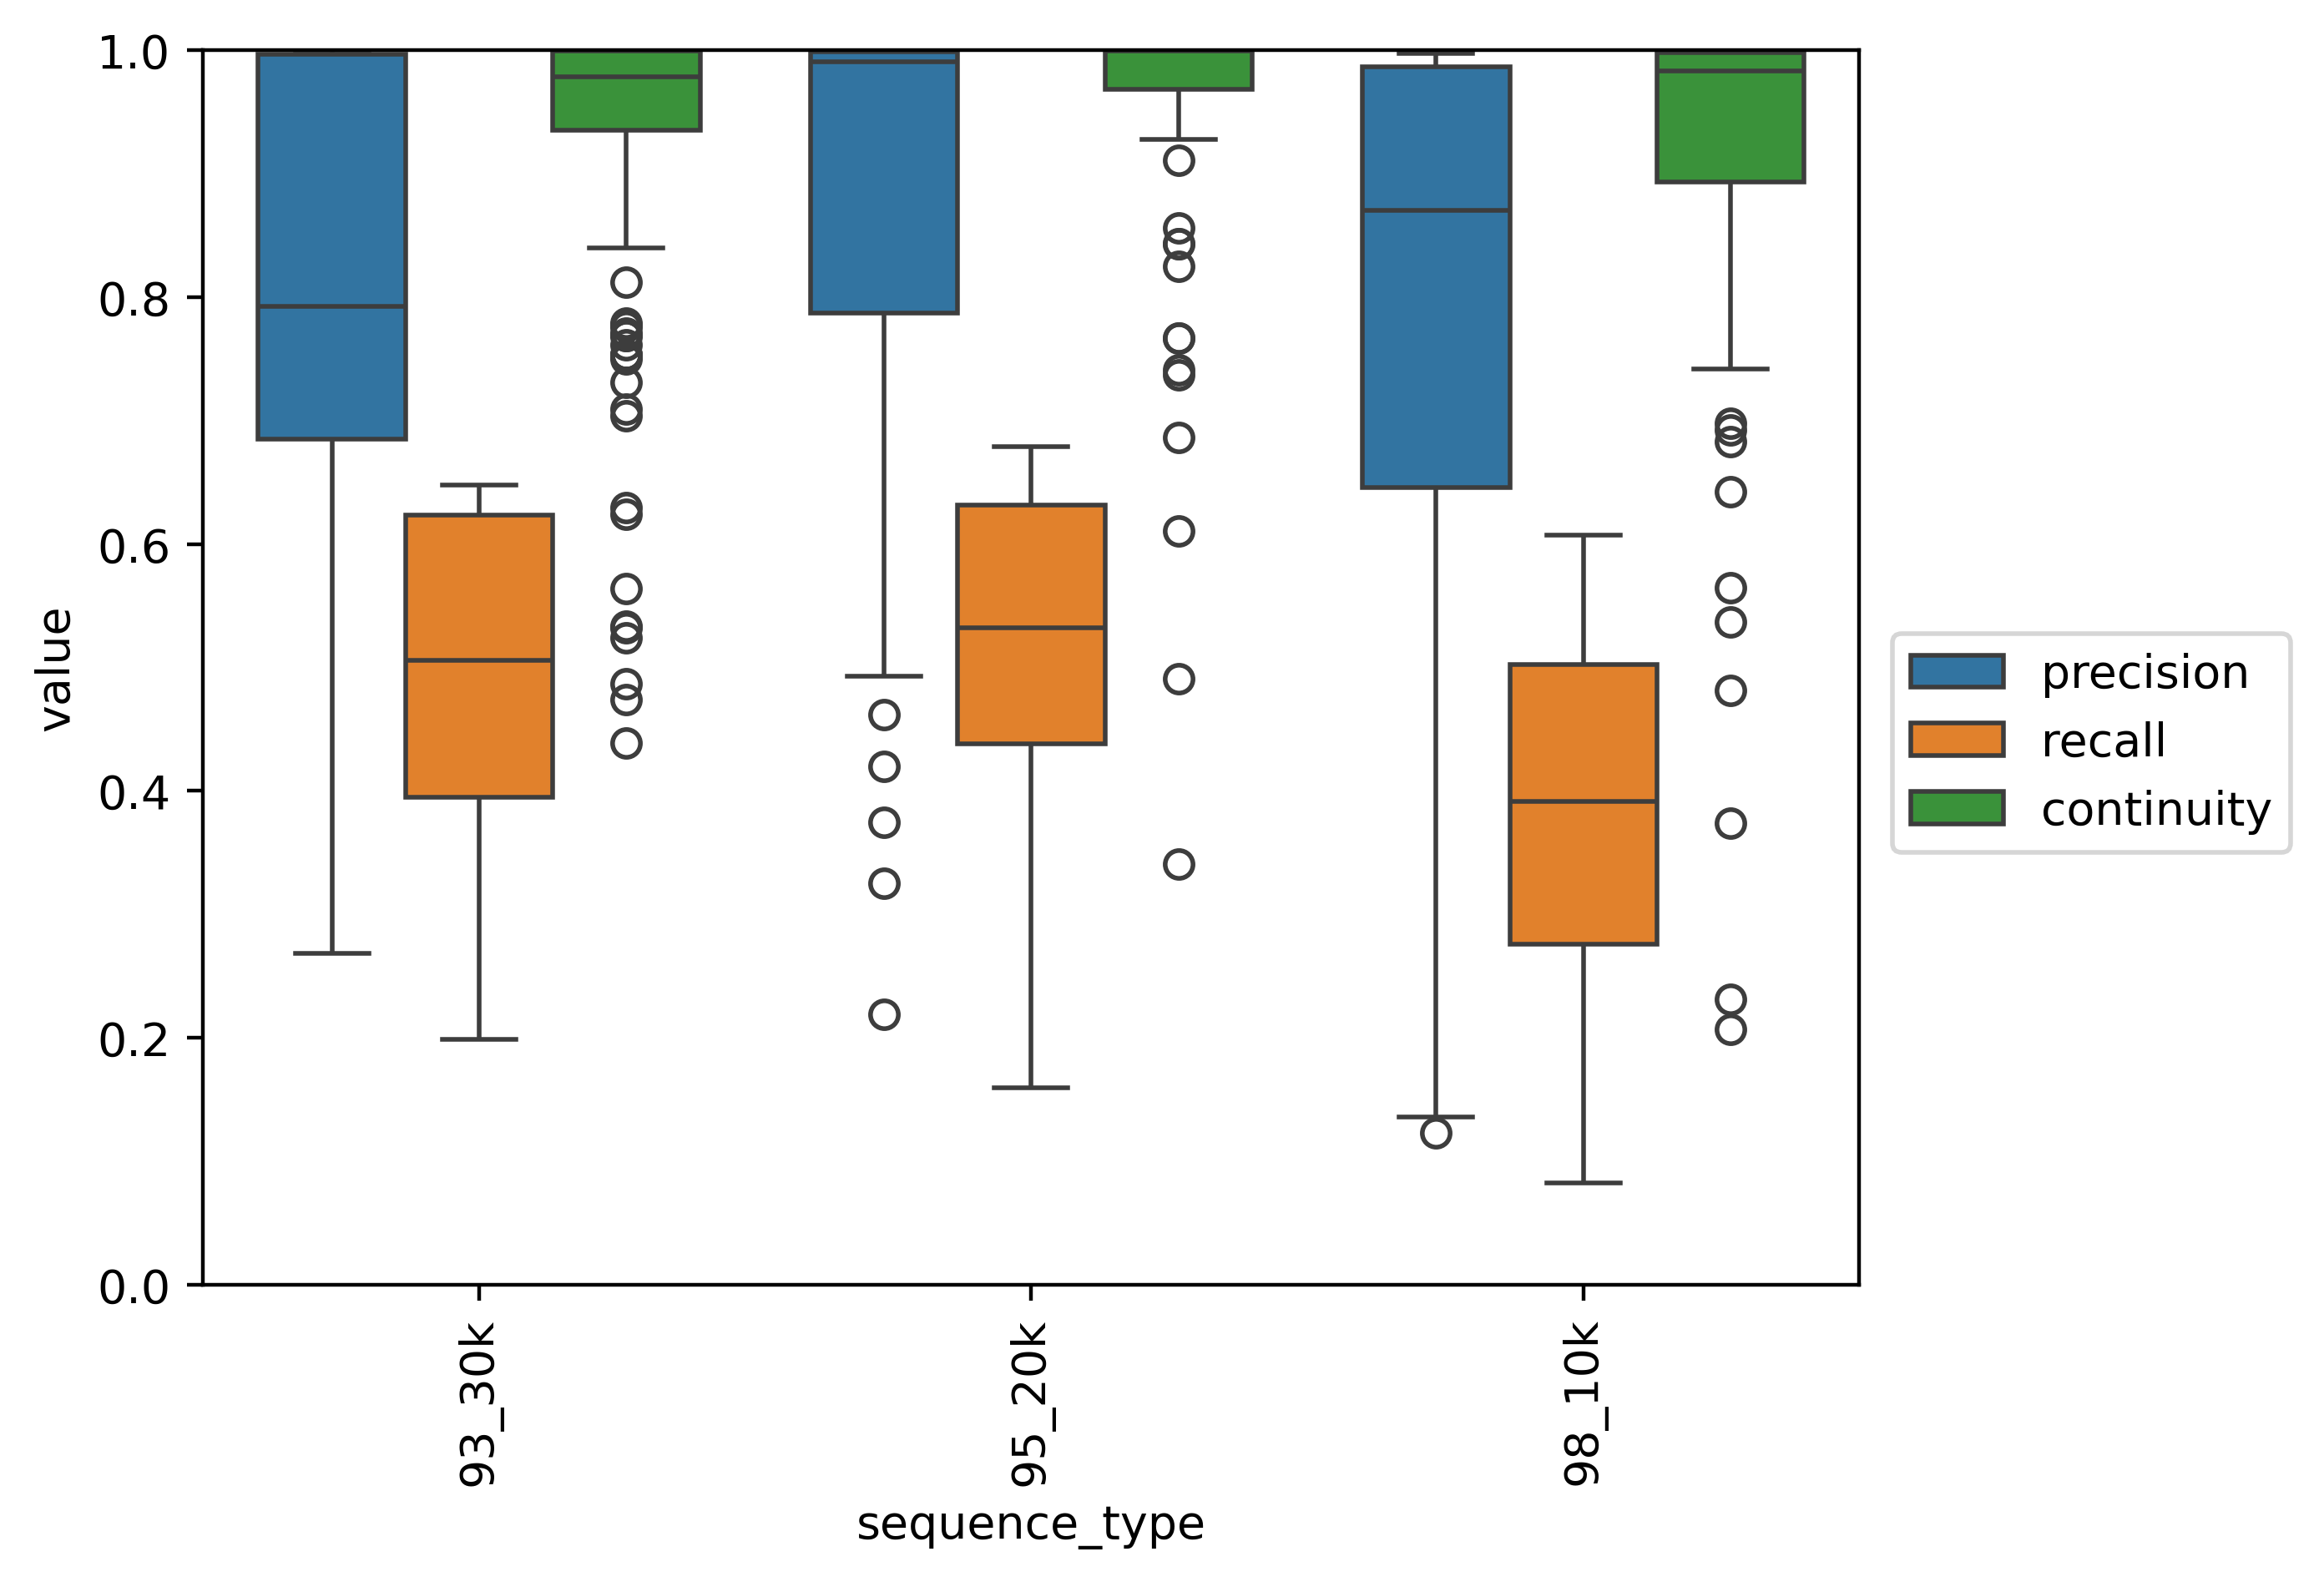

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x = 'sequence_type', y = 'value', data = one_line,hue='variable')  #绘制箱线图
plt.legend(loc = (1.02,0.35))
plt.ylim(0,1)
plt.xticks(rotation=90)

plt.show()

In [180]:
new_all_df = new_all_df.dropna()

In [181]:
new_all_df

,method,precision,recall,continuity,category,preprocess
0,HNSW_Cosine_GaussianRP_500d,0.990224,0.624149,0.995569,hla1,IDF
1,HNSW_Euclidean_Spectural_500d,0.621725,0.350215,0.731069,hla1,IDF
2,NewSimHash2_Cosine_None,0.999601,0.639989,1.0,hla1,None
3,HNSW_Cosine_SparseRP_500d,0.992125,0.621578,0.996912,hla1,IDF
4,HNSW_Cosine_Spectural_500d,0.997976,0.507364,1.0,hla1,None
...,...,...,...,...,...,...
23,HNSW_Euclidean_GaussianRP_500d,0.594866,0.474299,0.896603,yeast1,None
24,HNSW_Euclidean_SparseRP_500d,0.996645,0.630582,0.999001,yeast1,IDF
25,HNSW_Euclidean_GaussianRP_500d,0.996755,0.628245,1.0,yeast1,TF-IDF
26,HNSW_Cosine_GaussianRP_500d,0.999654,0.639927,1.0,yeast1,None


In [172]:
new_all_df['precision'].isnull().any()

False

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

# 进行多因素方差分析
model = ols('recall ~ C(regions) + C(sequence_type) + C(method) + C(preprocess)', data=new_all_df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table.to_csv('/home/miaocj/docker_dir/kNN-overlap-finder/data/final_analysis/recall_anova.csv')
print(anova_table)

mc = MultiComparison(new_all_df['recall'], new_all_df['preprocess'])
tukey_result = mc.tukeyhsd()
print(tukey_result)

                    sum_sq     df           F         PR(>F)
Intercept         3.137279    1.0  759.795279   2.531274e-96
C(regions)        0.975216    3.0   78.726850   1.919568e-40
C(sequence_type)  0.508794    2.0   61.610648   3.393374e-24
C(method)         5.293844   30.0   42.735947  2.072424e-108
C(preprocess)     0.350264    3.0   28.275973   1.124406e-16
Residual          1.738356  421.0         NaN            NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   IDF   None  -0.0602  0.006 -0.1075  -0.013   True
   IDF     TF  -0.0575 0.0137 -0.1064 -0.0086   True
   IDF TF-IDF  -0.0011 0.9999   -0.05  0.0478  False
  None     TF   0.0027 0.9988 -0.0444  0.0499  False
  None TF-IDF   0.0591 0.0072  0.0119  0.1063   True
    TF TF-IDF   0.0564  0.016  0.0076  0.1052   True
----------------------------------------------------


In [232]:
# 进行多因素方差分析
model = ols('precision ~ C(regions) + C(sequence_type) + C(method) + C(preprocess)', data=new_all_df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table.to_csv('/home/miaocj/docker_dir/kNN-overlap-finder/data/final_analysis/precess_anova.csv')
print(anova_table)

mc = MultiComparison(new_all_df['precision'], new_all_df['preprocess'])
tukey_result = mc.tukeyhsd()
print(tukey_result)

                    sum_sq     df           F        PR(>F)
Intercept         8.282425    1.0  695.986636  3.082675e-91
C(regions)        5.090190    3.0  142.579205  9.367691e-64
C(sequence_type)  0.325361    2.0   13.670324  1.769591e-06
C(method)         6.102324   30.0   17.092965  2.242777e-55
C(preprocess)     1.347472    3.0   37.743476  1.277161e-21
Residual          5.010011  421.0         NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   IDF   None  -0.1284    0.0 -0.1935 -0.0633   True
   IDF     TF  -0.1085 0.0002 -0.1759 -0.0411   True
   IDF TF-IDF   0.0014 0.9999  -0.066  0.0688  False
  None     TF   0.0199 0.8588 -0.0451  0.0849  False
  None TF-IDF   0.1298    0.0  0.0648  0.1948   True
    TF TF-IDF   0.1099 0.0002  0.0427  0.1771   True
----------------------------------------------------


In [288]:
#weighted = ['MinHash','MinHash+IDF','MinHash+TF','MinHash+TF-IDF']
weighted_method = ['Exact_Euclidean_None_IDF','Exact_Cosine_None_IDF','WeightedMinHash_Jaccard_None_IDF','Minimap2']

In [291]:
tair1

,0,1,2,3,4,5,6,7,8,9,10,11
0,4,Minimap2,6,0.996641,0.207122,0.249723,0.543773,22,0.000725,15167,0.999473,NaN
1,4,HNSW_Euclidean_Spectural_500d_TF,6,0.691341,0.150717,0.144693,0.330513,2569,0.084646,102,0.006722,NaN
2,4,Exact_Euclidean_None_TF-IDF,6,0.997385,0.277023,0.219659,0.639251,6,0.000198,5318,0.350445,NaN
3,4,Exact_Euclidean_None_TF,6,0.677190,0.195802,0.171851,0.520630,2108,0.069456,1177,0.077562,NaN
4,4,Exact_Cosine_None_None,6,0.996426,0.277529,0.218321,0.637131,8,0.000264,5318,0.350445,NaN
5,4,HNSW_Euclidean_Spectural_500d_TF-IDF,6,0.873256,0.195070,0.169670,0.397122,879,0.028962,344,0.022669,NaN
6,4,HNSW_Cosine_Spectural_500d_TF,6,0.872154,0.206213,0.176554,0.437391,675,0.022241,248,0.016343,NaN
7,4,Exact_Cosine_None_TF,6,0.996426,0.277529,0.218321,0.637131,8,0.000264,5318,0.350445,NaN
8,4,HNSW_Euclidean_Spectural_500d_None,6,0.681046,0.148491,0.143351,0.327488,2715,0.089456,103,0.006787,NaN
9,4,Exact_Euclidean_None_None,6,0.677190,0.195802,0.171851,0.520630,2108,0.069456,1177,0.077562,NaN


In [289]:
part2 = all_df3[all_df3.iloc[:,0].isin(weighted_method)].sort_values(by=['category','method'])

In [290]:
part2

,method,precision,recall,continuity,category,regions,sequence_type
39,Exact_Cosine_None_IDF,0.999509,0.643740,1.0,hla1,hla,93_30k
34,Exact_Euclidean_None_IDF,0.999509,0.643740,1.0,hla1,hla,93_30k
28,Minimap2,0.969069,0.524246,0.986574,hla1,hla,93_30k
18,WeightedMinHash_Jaccard_None_IDF,0.993887,0.242462,0.999866,hla1,hla,93_30k
12,Exact_Cosine_None_IDF,0.998189,0.678610,1.0,hla2,hla,95_20k
9,Exact_Euclidean_None_IDF,0.998189,0.678610,1.0,hla2,hla,95_20k
7,Minimap2,0.958368,0.572303,0.984473,hla2,hla,95_20k
4,WeightedMinHash_Jaccard_None_IDF,0.990511,0.230382,0.999716,hla2,hla,95_20k
12,Exact_Cosine_None_IDF,0.995940,0.607389,0.99981,hla3,hla,98_10k
9,Exact_Euclidean_None_IDF,0.995940,0.607389,0.99981,hla3,hla,98_10k


IndexError: list index out of range

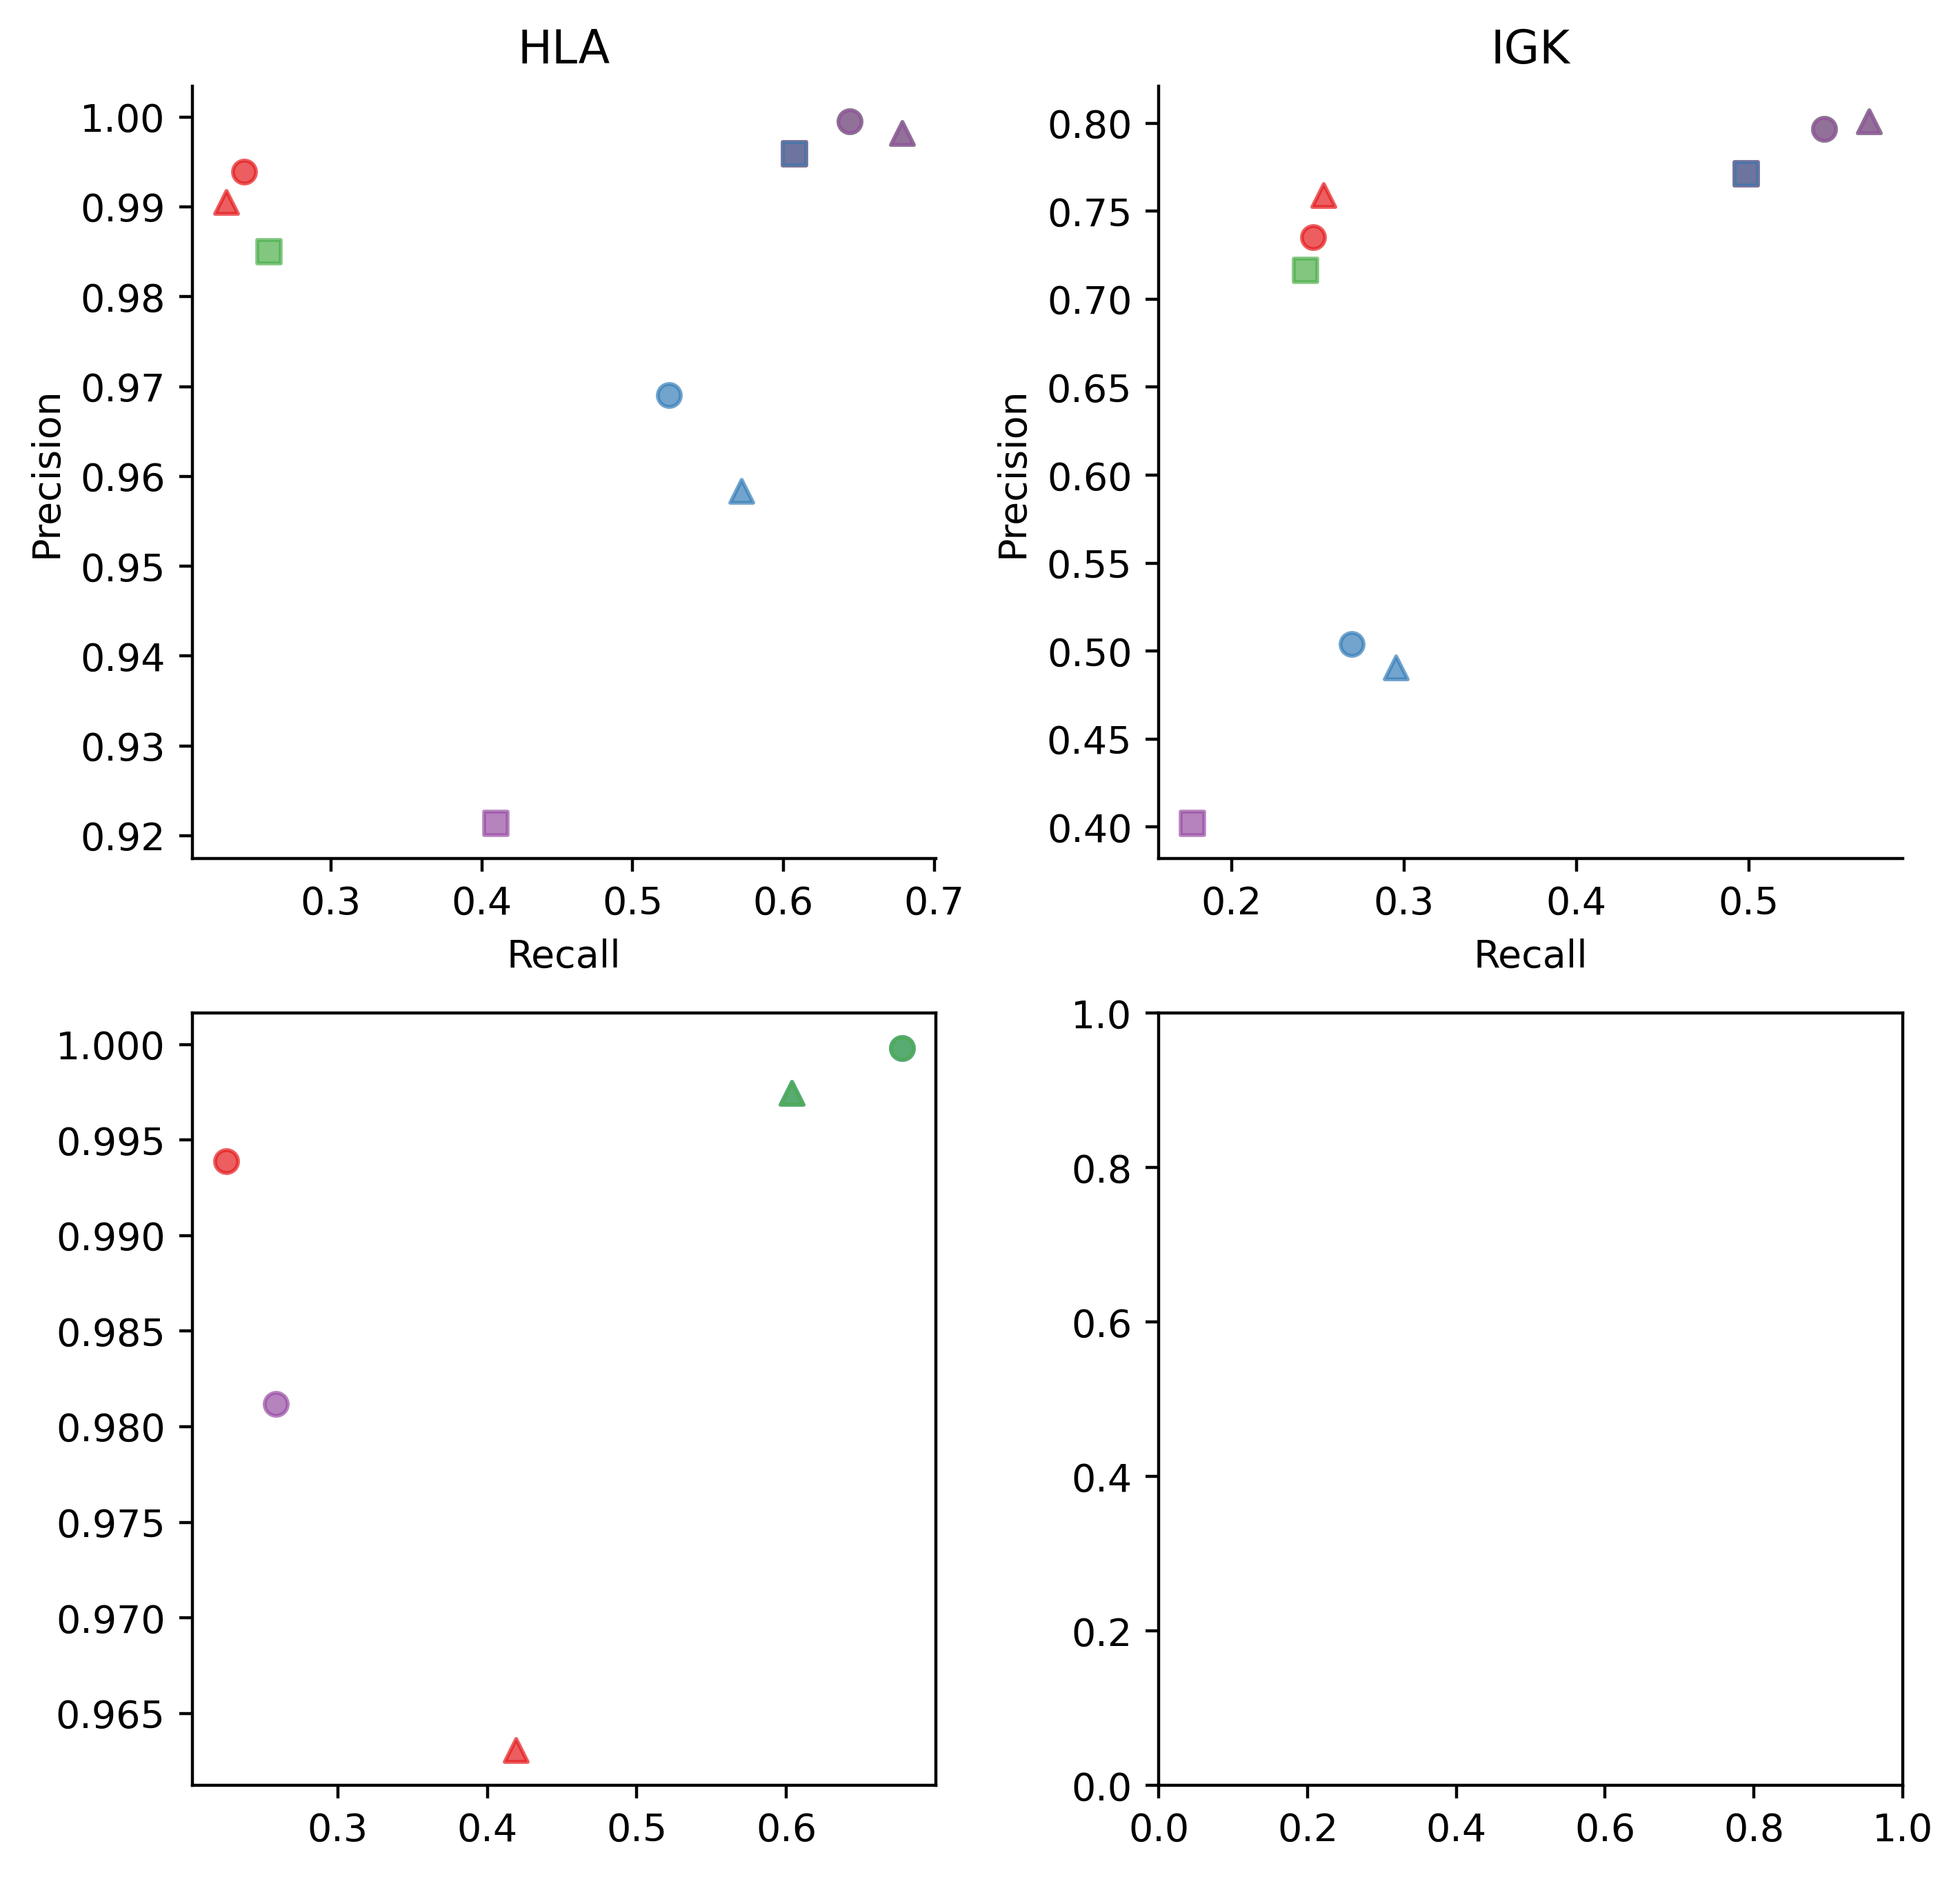

In [279]:
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,8))
fig.subplots_adjust(wspace=0.3)
regions_origin = ['hla','igk','tair','yeast']
regions = ['HLA','IGK','Arabidopsis','Yeast']
for num,ax in enumerate([ax1,ax2,ax3,ax4]):
    y = part2[part2['category'].str.contains(regions_origin[num], case=False)].iloc[:,1].tolist()
    x = part2[part2['category'].str.contains(regions_origin[num], case=False)].iloc[:,2].tolist()
    category_color = colors[:4]+colors[:4]+colors[:4]
    category_shape = ['o']*4+['^']*4+['s']*4
    for i in range(0,12):
        ax.scatter(x[i], y[i], color=category_color[i], marker= category_shape[i],alpha=0.7)
    ax.set_title(regions[num])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

plt.subplots_adjust(hspace=0.3)

ax1.set_ylim(0.95,1)
ax1.set_xlim(0.215,0.265)

ax2.set_xlim(0.215,0.265)

ax3.set_ylim(0.95,1)
ax3.set_xlim(0.215,0.265)

ax4.set_ylim(0.95,1.001)
ax4.set_xlim(0.215,0.265)

shape_list = ['o','s','^']


symbol_handles = [plt.Line2D([0], [0], marker=shape_list[i], color='w', markerfacecolor='black', markersize=10) 
                  for i in range(0,3)]
symbol_labels = ['8%Error/30k','5%Error/20k','2%Error/10k']
shape_legend = ax.legend(handles=symbol_handles, labels=symbol_labels, loc='upper right',frameon=False,bbox_to_anchor=(1.6,1.6))
ax.add_artist(shape_legend)
color_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=colors[i], markersize=10)
                 for i in range(0,4)]
color_labels = ['MinHash','MinHash+IDF','MinHash+TF','MinHash+TF-IDF'] 
ax.legend(handles=color_handles, labels=color_labels, loc='upper left',frameon=False,bbox_to_anchor=(1.05, 1))
# 将颜色图例添加到图中


plt.show()


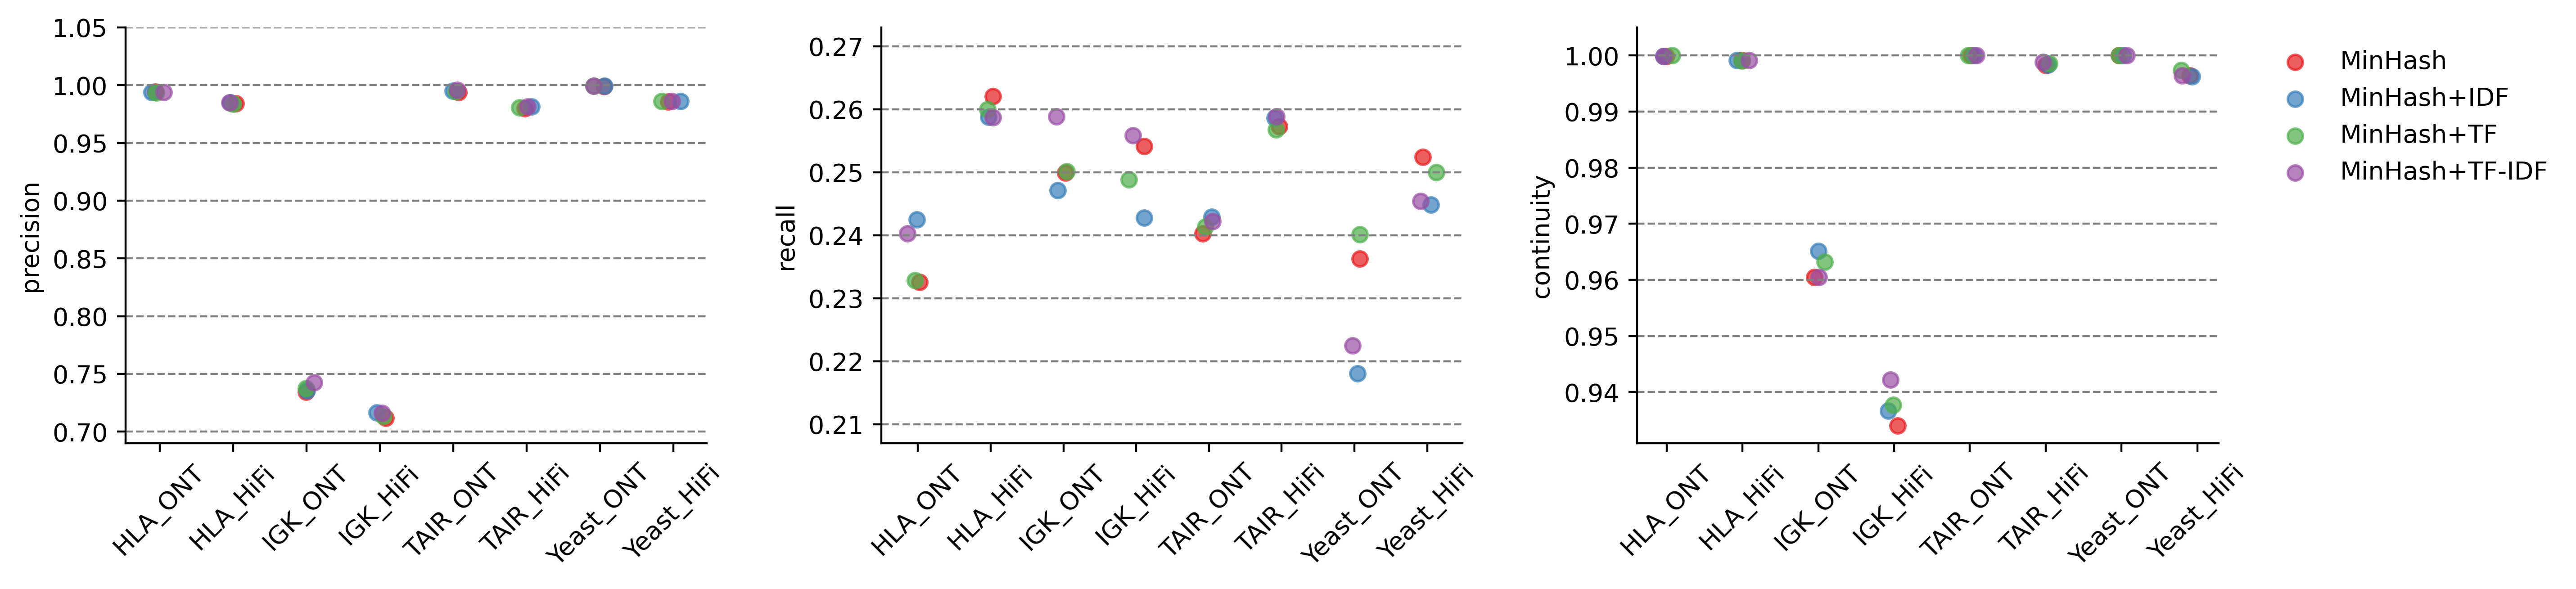

In [ ]:
samples=['HLA_ONT','HLA_HiFi','IGK_ONT','IGK_HiFi','TAIR_ONT','TAIR_HiFi','Yeast_ONT','Yeast_HiFi']
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(2,3,figsize=(15,3))
fig.subplots_adjust(wspace=0.3)
values = [precision,recall,continuity]
ylabel = ['precision','recall','continuity']

for num,ax in enumerate([ax1,ax2,ax3]):
    for i, method in enumerate(weighted):
        method_values = values[num][i*8:(i+1)*8]
        x = rand_jitter([1,2,3,4,5,6,7,8])
        ax.scatter(x, method_values, color=colors[i], label=method,alpha=0.7)
    # ax.spines['left'].set_visible(False)
    ax.set_xticks(ticks = [1,2,3,4,5,6,7,8],labels = samples)
    ax.set_xticklabels(samples, rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yticks = ax.get_yticks()
    for y in yticks:
        ax.axhline(y=y, linestyle='--', color='gray', linewidth=0.8)
    ax.set_ylabel(ylabel[num])

ax1.set_ylim(0.69,1.05)
ax3.set_ylim(0.9309,1.005)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

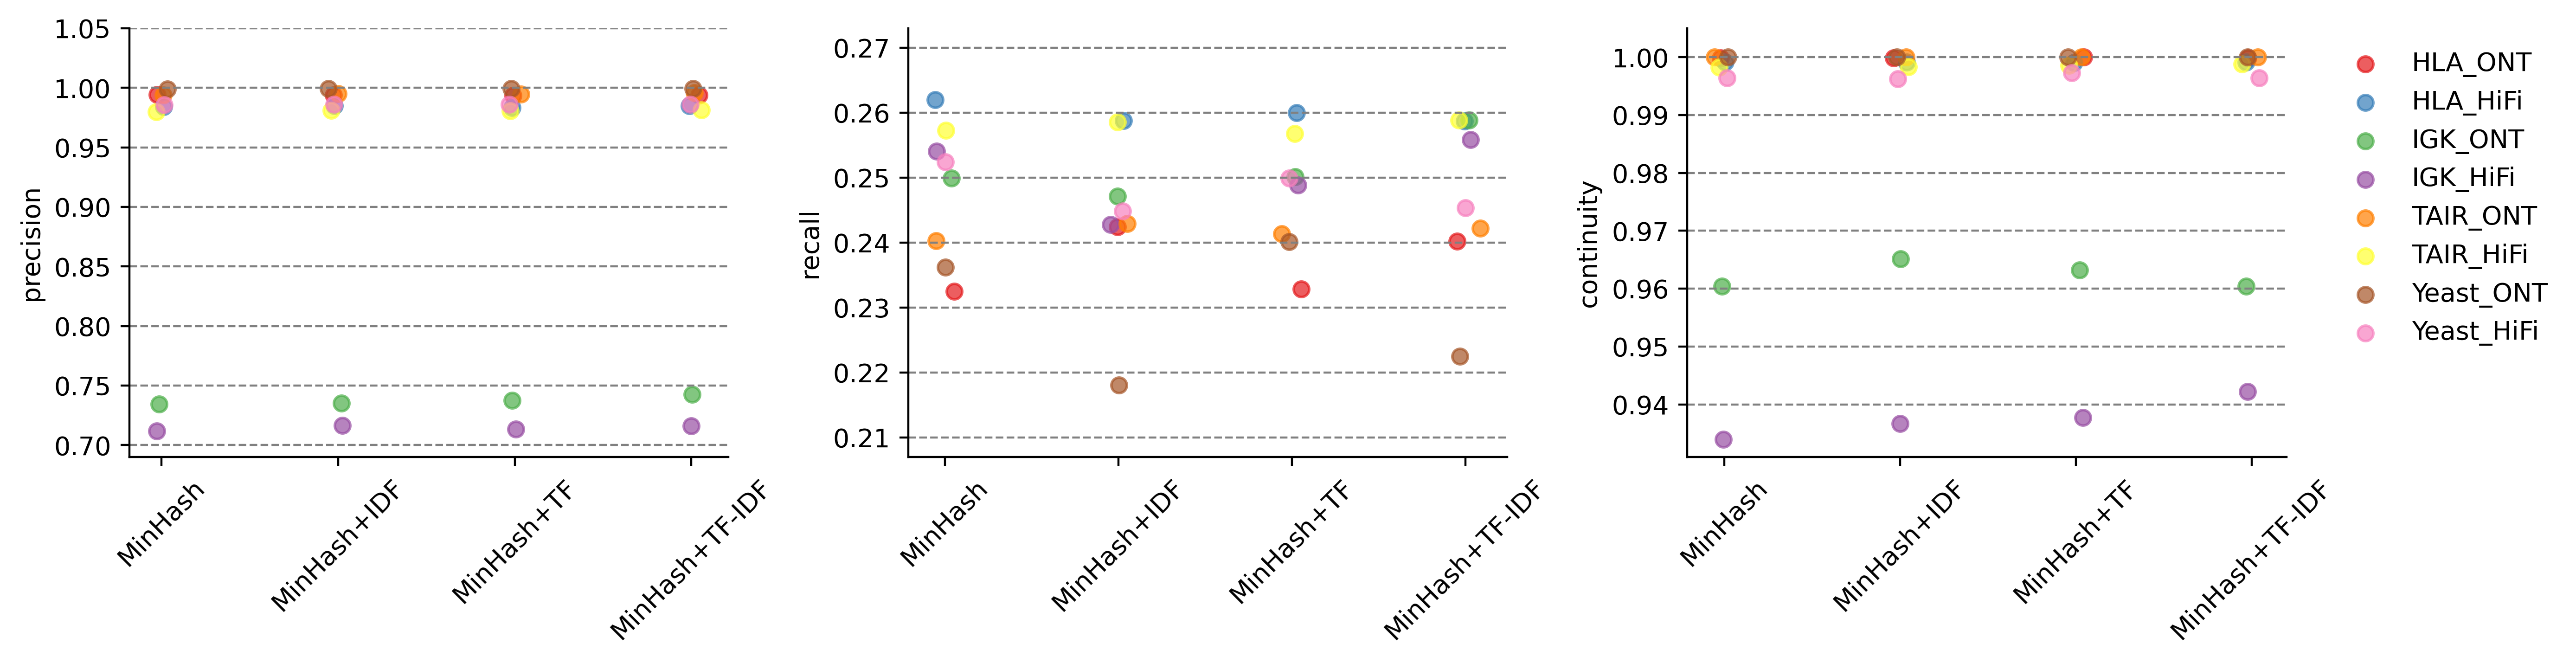

In [148]:
samples=['HLA_ONT','HLA_HiFi','IGK_ONT','IGK_HiFi','TAIR_ONT','TAIR_HiFi','Yeast_ONT','Yeast_HiFi']
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,3))
fig.subplots_adjust(wspace=0.3)
values = [precision,recall,continuity]
ylabel = ['precision','recall','continuity']

for num,ax in enumerate([ax1,ax2,ax3]):
    for i, method in enumerate(samples):
        ind = [i,i+8,i+16,i+24]
        method_values =  [values[num][x] for x in ind]
        x = rand_jitter([1,2,3,4])
        ax.scatter(x, method_values, color=colors[i], label=samples[i],alpha=0.7)
    # ax.spines['left'].set_visible(False)
    ax.set_xticks(ticks = [1,2,3,4],labels = weighted)
    ax.set_xticklabels(weighted, rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yticks = ax.get_yticks()
    for y in yticks:
        ax.axhline(y=y, linestyle='--', color='gray', linewidth=0.8)
    ax.set_ylabel(ylabel[num])

ax1.set_ylim(0.69,1.05)
ax3.set_ylim(0.9309,1.005)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

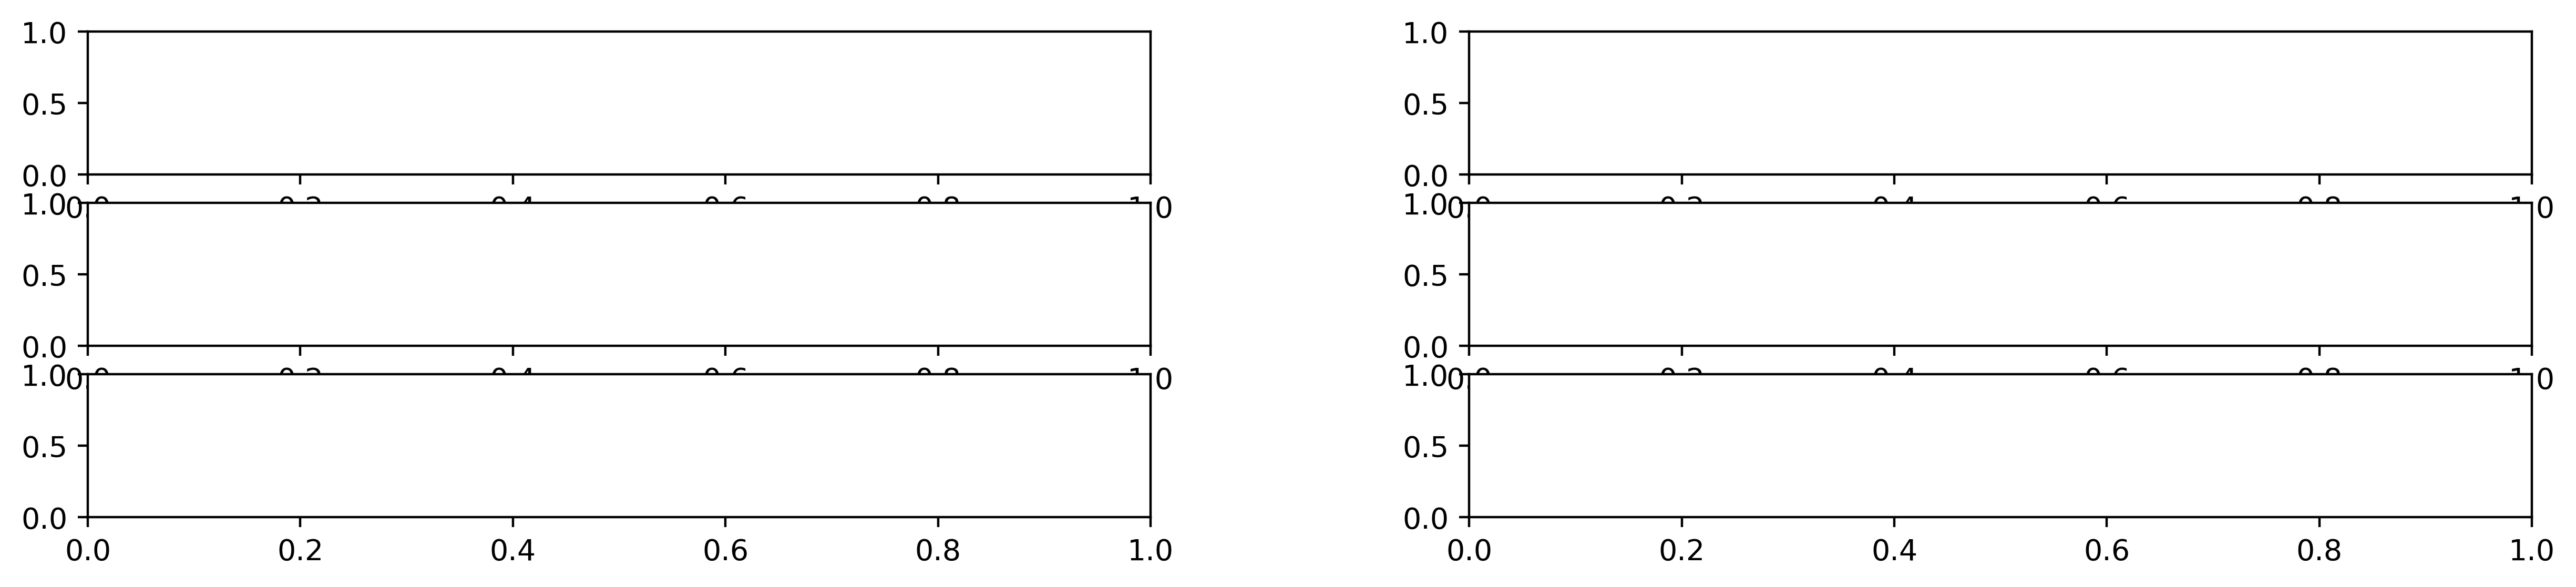

In [149]:
samples=['HLA_ONT','HLA_HiFi','IGK_ONT','IGK_HiFi','TAIR_ONT','TAIR_HiFi','Yeast_ONT','Yeast_HiFi']
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, (ax1,ax2,ax3) = plt.subplots(3,2,figsize=(15,3))
fig.subplots_adjust(wspace=0.3)
values = [precision,recall,continuity]
ylabel = ['precision','recall','continuity']

for num,ax in enumerate([ax1,ax2,ax3]):
    for i, method in enumerate(samples):
        ind = [i,i+8,i+16,i+24]
        method_values =  [values[num][x] for x in ind]
        x = rand_jitter([1,2,3,4])
        ax.scatter(x, method_values, color=colors[i], label=samples[i],alpha=0.7)
    # ax.spines['left'].set_visible(False)
    ax.set_xticks(ticks = [1,2,3,4],labels = weighted)
    ax.set_xticklabels(weighted, rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yticks = ax.get_yticks()
    for y in yticks:
        ax.axhline(y=y, linestyle='--', color='gray', linewidth=0.8)
    ax.set_ylabel(ylabel[num])

ax1.set_ylim(0.69,1.05)
ax3.set_ylim(0.9309,1.005)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

In [55]:
i=0
range(i*8,(i+1)*8)

range(0, 8)

In [ ]:
samples=['TAIR_6','TAIR_12','yeast_6','yeast_12']
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,3))
fig.subplots_adjust(wspace=0.3)
values = [precision,recall,continuity]
ylabel = ['precision','recall','continuity']

for num,ax in enumerate([ax1,ax2,ax3]):
    for i, sample in enumerate(samples):
        method_values = values[num][i*4:i*4+4]
        ax.scatter(weighted, method_values, color=colors[i],label=sample,alpha=0.5)
    ax.set_xticks(weighted, weighted, rotation=70)
    # ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yticks = ax.get_yticks()
    for y in yticks:
        ax.axhline(y=y, linestyle='--', color='gray', linewidth=0.8)
    ax.set_ylabel(ylabel[num])
ax3.set_ylim(0,1.05)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)